## Import Data From Excel

In [103]:
import pandas as pd
data = pd.read_csv("Datab.csv")


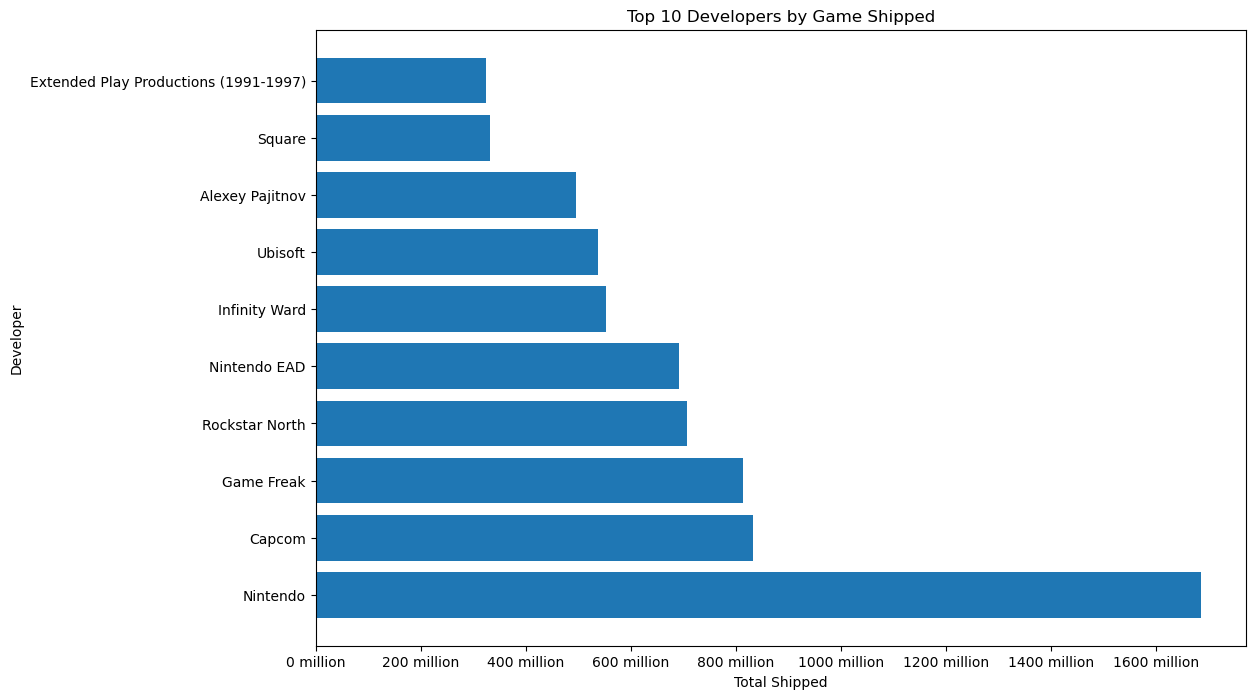

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sample Data Reading
data = pd.read_csv('Datab.csv')

# Cleaning and aggregating data, replace the "million" or "m" in the column and change it to numbers
data['Total Shipped'] = data['Total Shipped'].str.replace('m', '').astype(float) * 1e6 

#Group the developers with their games' total shipped amount (this expression learn from Chatgpt)
developer_shipped = data.groupby('Developer')['Total Shipped'].sum().sort_values(ascending=False)

# Define a formatter function to make the x-axis eazy to illustrate
def millions_formatter(x, pos):
    return '{} million'.format(int(x * 1e-6))

# Plotting
N = 10
top_developers_shipped = developer_shipped.head(N)

plt.figure(figsize=(12, 8))
plt.barh(top_developers_shipped.index, top_developers_shipped.values)

formatter = ticker.FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top {} Developers by Game Shipped'.format(N))
plt.xlabel('Total Shipped')
plt.ylabel('Developer')
plt.show()









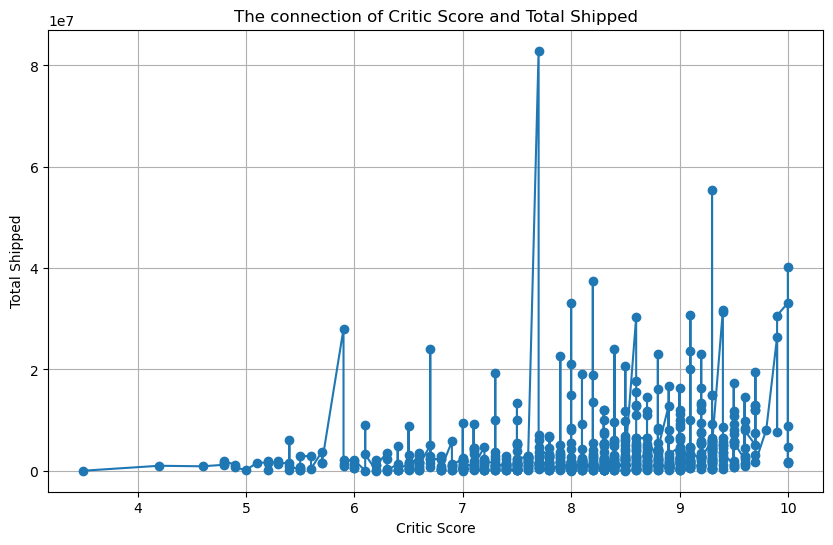

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering 
filtered_data = data[data['Critic Score'] > 1].dropna(subset=['Total Shipped'])

# Sorting by Critic Score for a continuous line graph(expression learned from internet)
filtered_data = filtered_data.sort_values(by="Critic Score")

# Extracting values
critic_scores = filtered_data['Critic Score'].values
total_shipped = filtered_data['Total Shipped'].values

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(critic_scores, total_shipped, marker='o', linestyle='-')
plt.xlabel("Critic Score")
plt.ylabel('Total Shipped')
plt.title('The connection of Critic Score and Total Shipped')
plt.grid(True)
plt.show()




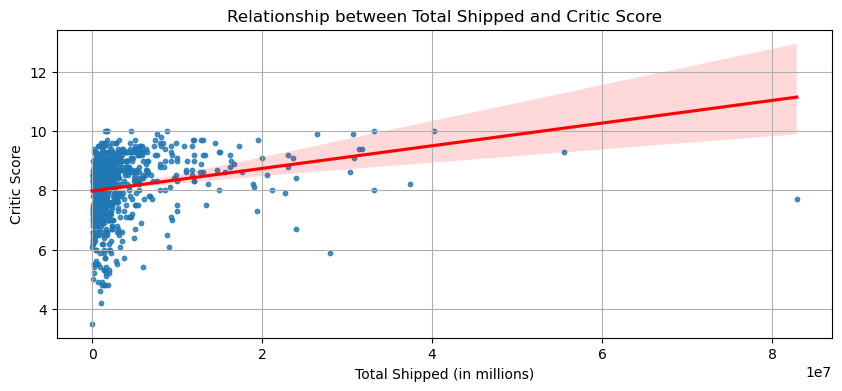

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Total Shipped' to numerical values(same expression as above to change the "total_shipped" into numbers)
data['Total Shipped'] = data['Total Shipped'].astype(str)

# Replace 'm' and convert to float
data['Total Shipped'] = data['Total Shipped'].str.replace('m', '').astype(float)


# Filter the data
filtered_data = data[data['Critic Score'] > 1].dropna(subset=['Total Shipped', 'Critic Score'])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.regplot(x=filtered_data['Total Shipped'], y=filtered_data['Critic Score'], scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relationship between Total Shipped and Critic Score')
plt.xlabel('Total Shipped (in millions)')
plt.ylabel('Critic Score')
plt.grid(True)
plt.show()



/var/folders/yp/7w9x9wfj54j35v5rdv6pnvm00000gn/T/ipykernel_56174/3143901875.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce', dayfirst=True)


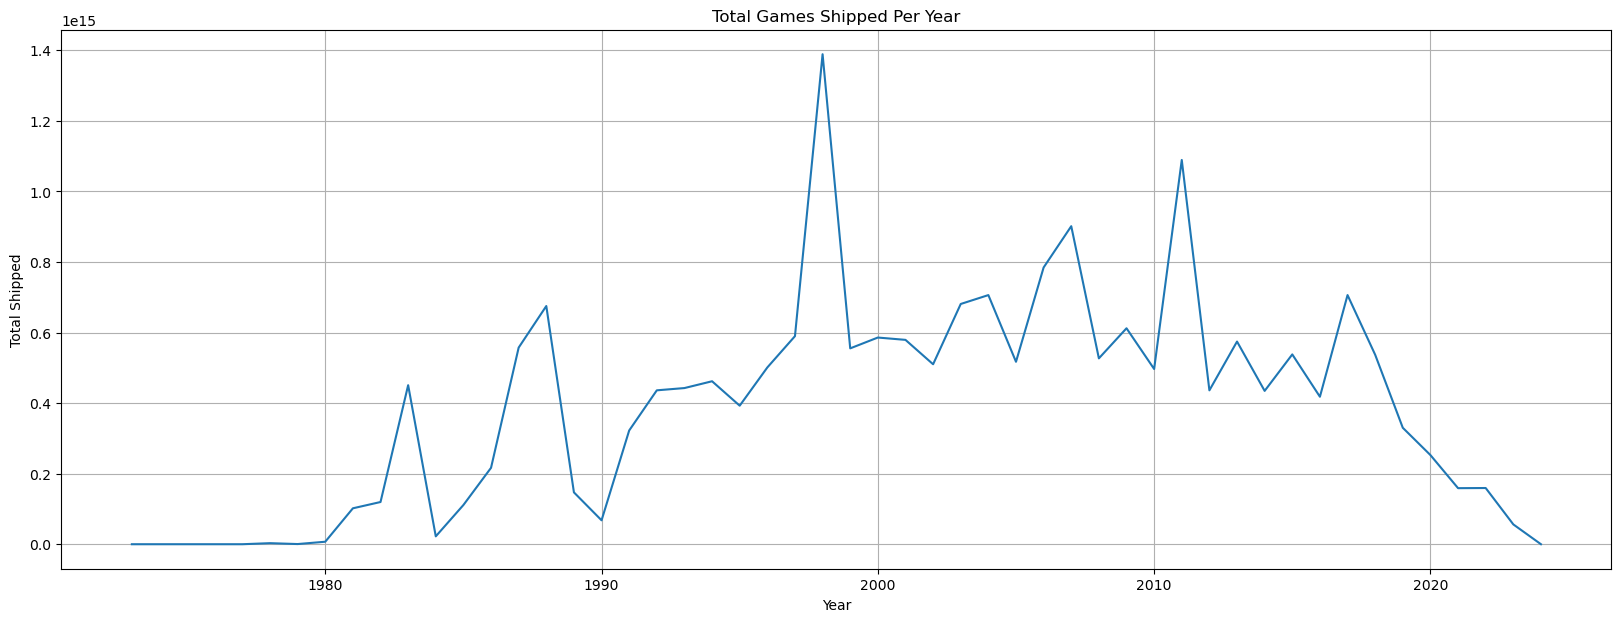

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Same expression to convert the str of Total shipped to numbers
data['Total Shipped'] = data['Total Shipped'].astype(str)

# Convert 'Total Shipped' to float by removing "m" and multiplying by 1 million
data['Total Shipped'] = data['Total Shipped'].str.replace('m', '').astype(float) * 1e6 


# Convert 'Release Date' to datetime format
data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce', dayfirst=True)

# Group by 'Release Date' and sum up the 'Total Shipped' for that year
grouped = data.groupby(data["Release Date"].dt.year)["Total Shipped"].sum()

# Restrict the graph to 2030 to make it precise
grouped = grouped[grouped.index <= 2030]

# Plot
plt.figure(figsize=(20,7))
grouped.plot()
plt.title("Total Games Shipped Per Year")
plt.xlabel("Year")
plt.ylabel("Total Shipped")
plt.grid(True)
plt.show()
